# Predicting Company Profit Based on Expenditure and State Information

### problem statement:

You have been provided with a dataset containing information about Productivity,Management,Promotions Expenditures and state,profit.
your task is to analyze the relationship between the profit and expenditures  .Using simple regression,you aim to bulid a predicitive model
to estimate the Predicting Company Profit Based on Expenditure and State Information



#### Importing the libraries

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [50]:
df=pd.read_csv("companies.csv")

In [51]:
df.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,State,Profit
0,220349.20,236897.80,521784.10,Texas,242261.83
1,217597.70,251377.59,493898.53,Illinois,241792.06
2,208441.51,201145.55,457934.54,Washington,241050.39
3,199372.41,218671.85,433199.62,Texas,232901.99
4,197107.34,191391.77,416168.42,Washington,216187.94


In [52]:
df.tail()

,Productivity_Exp,Management_Exp,Promotions_Exp,State,Profit
45,56000.23,224153.04,51903.93,Texas,114926.08
46,56315.46,215816.21,347114.46,Washington,99490.75
47,55000.00,235426.92,50000.00,Illinois,92559.73
48,55542.05,151743.15,50000.00,Texas,85673.41
49,55000.00,216983.80,95173.06,Illinois,64681.40


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Productivity_Exp  50 non-null     float64
 1   Management_Exp    50 non-null     float64
 2   Promotions_Exp    50 non-null     float64
 3   State             50 non-null     object 
 4   Profit            50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [54]:
df.describe()

,Productivity_Exp,Management_Exp,Promotions_Exp,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,128721.615600,221344.639600,261025.097800,162012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,55000.000000,151283.140000,50000.000000,64681.400000
25%,94936.370000,203730.875000,179300.132500,140138.902500
50%,128051.080000,222699.795000,262716.240000,157978.190000
75%,156602.800000,244842.180000,349469.085000,189765.977500
max,220349.200000,282645.560000,521784.100000,242261.830000


In [55]:
df.shape

(50, 5)

#### Asking Questions to data

In [ ]:
1.productivity_exp and profit by using scatterplot
2.Draw the kdeplot using Productivity_Exp

# EDA

<Axes: xlabel='Productivity_Exp', ylabel='Profit'>

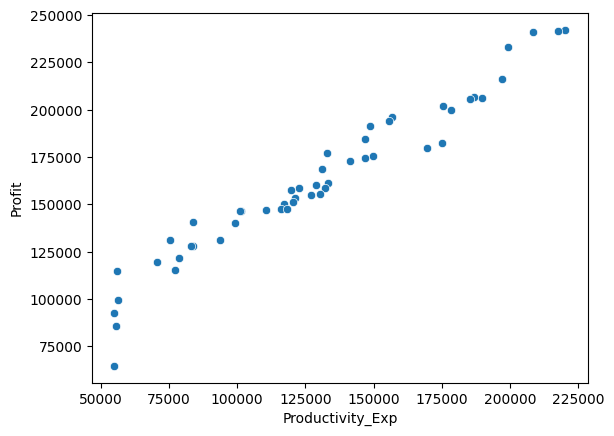

In [66]:
#1.productivity_exp and profit by using scatterplot 
sns.scatterplot(df,x="Productivity_Exp",y="Profit")

<Axes: xlabel='Productivity_Exp', ylabel='Density'>

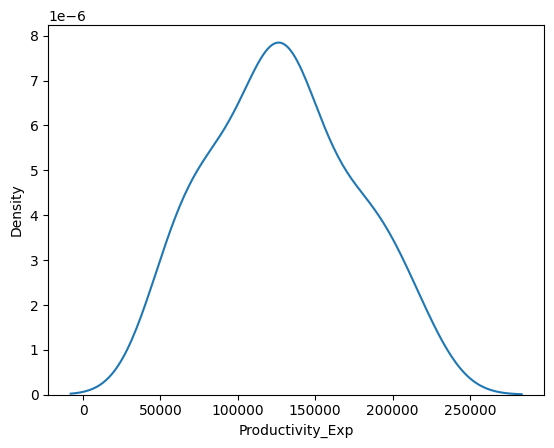

In [65]:
#2.Draw the kdeplot using Productivity_Exp
sns.kdeplot(data=df,x="Productivity_Exp")

#### Converting the categorical to numerical using get_dummies

In [9]:
data = pd.get_dummies(df,columns=['State'], drop_first=False)

In [10]:
data.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,Profit,State_Illinois,State_Texas,State_Washington
0,220349.20,236897.80,521784.10,242261.83,False,True,False
1,217597.70,251377.59,493898.53,241792.06,True,False,False
2,208441.51,201145.55,457934.54,241050.39,False,False,True
3,199372.41,218671.85,433199.62,232901.99,False,True,False
4,197107.34,191391.77,416168.42,216187.94,False,False,True


#### correlation

In [11]:
data.corr()

,Productivity_Exp,Management_Exp,Promotions_Exp,Profit,State_Illinois,State_Texas,State_Washington
Productivity_Exp,1.000000,0.241955,0.724248,0.972900,-0.143165,0.039068,0.105711
Management_Exp,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.005145,0.010493
Promotions_Exp,0.724248,-0.032154,1.000000,0.747766,-0.168875,-0.033670,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.031368,0.116244
State_Illinois,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.515152,-0.492366
State_Texas,0.039068,0.005145,-0.033670,0.031368,-0.515152,1.000000,-0.492366
State_Washington,0.105711,0.010493,0.205685,0.116244,-0.492366,-0.492366,1.000000


#### correlation of data1

In [12]:
data1=data.drop(columns=['Profit'])

In [13]:
data1.tail()

,Productivity_Exp,Management_Exp,Promotions_Exp,State_Illinois,State_Texas,State_Washington
45,56000.23,224153.04,51903.93,False,True,False
46,56315.46,215816.21,347114.46,False,False,True
47,55000.00,235426.92,50000.00,True,False,False
48,55542.05,151743.15,50000.00,False,True,False
49,55000.00,216983.80,95173.06,True,False,False


In [14]:
data1.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,State_Illinois,State_Texas,State_Washington
0,220349.20,236897.80,521784.10,False,True,False
1,217597.70,251377.59,493898.53,True,False,False
2,208441.51,201145.55,457934.54,False,False,True
3,199372.41,218671.85,433199.62,False,True,False
4,197107.34,191391.77,416168.42,False,False,True


#### correlation of data2

In [15]:
data2=data.iloc[:,3:4]

In [16]:
data2.head()

,Profit
0,242261.83
1,241792.06
2,241050.39
3,232901.99
4,216187.94


### train_test_split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1,data2,test_size=0.2,random_state=2)

In [18]:
x_train.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,State_Illinois,State_Texas,State_Washington
24,132044.01,199281.34,190574.81,False,True,False
48,55542.05,151743.15,50000.00,False,True,False
17,149657.16,245077.58,332574.31,False,True,False
12,148863.75,227320.38,299839.44,False,False,True
27,127107.60,227864.55,403183.81,False,True,False


In [19]:
x_test.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,State_Illinois,State_Texas,State_Washington
36,83663.76,227056.21,251126.82,False,False,True
47,55000.00,235426.92,50000.00,True,False,False
28,121051.52,282645.56,168148.20,False,False,True
9,178334.88,208679.17,354981.62,True,False,False
13,146992.39,235495.07,302664.93,True,False,False


In [20]:
x_train.shape

(40, 6)

In [21]:
x_test.shape

(10, 6)

### importing the LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [24]:
x_train.head()

,Productivity_Exp,Management_Exp,Promotions_Exp,State_Illinois,State_Texas,State_Washington
24,132044.01,199281.34,190574.81,False,True,False
48,55542.05,151743.15,50000.00,False,True,False
17,149657.16,245077.58,332574.31,False,True,False
12,148863.75,227320.38,299839.44,False,False,True
27,127107.60,227864.55,403183.81,False,True,False


In [25]:
y_train.head()

,Profit
24,158552.04
48,85673.41
17,175370.37
12,191585.52
27,155008.31


## Fit

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
x_test

,Productivity_Exp,Management_Exp,Promotions_Exp,State_Illinois,State_Texas,State_Washington
36,83663.76,227056.21,251126.82,False,False,True
47,55000.00,235426.92,50000.00,True,False,False
28,121051.52,282645.56,168148.20,False,False,True
9,178334.88,208679.17,354981.62,True,False,False
13,146992.39,235495.07,302664.93,True,False,False
0,220349.20,236897.80,521784.10,False,True,False
44,77177.74,254806.14,78334.72,True,False,False
46,56315.46,215816.21,347114.46,False,False,True
39,93558.51,182982.09,224999.30,True,False,False
23,122532.53,205751.03,354768.73,False,False,True


In [28]:
lr.predict([[56315,215816.61,347114,0,0,1]])

C:\Users\saika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[104934.73902582]])

In [29]:
y_test

,Profit
36,140708.19
47,92559.73
28,153282.38
9,199759.96
13,184307.35
0,242261.83
44,115200.33
46,99490.75
39,131005.76
23,158733.99


### pairplot()

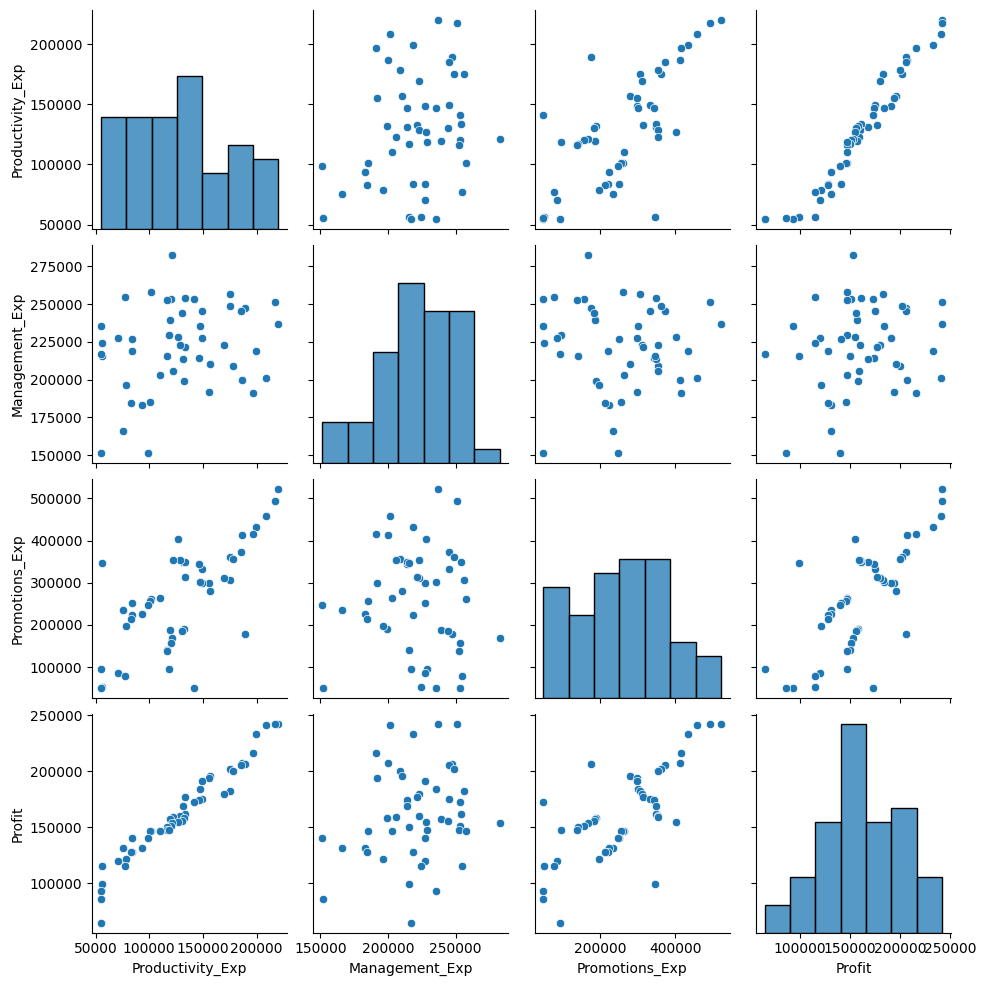

In [30]:
sns.pairplot(data, vars=['Productivity_Exp', 'Management_Exp', 'Promotions_Exp', 'Profit'])

## Model Evaluation

In [31]:
from sklearn .metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
y_pred=lr.predict(x_test)

In [33]:
y_pred

array([[124061.28471146],
       [ 96009.23798771],
       [149637.26360778],
       [205786.53229364],
       [177636.76349543],
       [242765.18597815],
       [113906.99972437],
       [104935.14415875],
       [134532.35238001],
       [159460.29711996]])

In [34]:
y_test.values

array([[140708.19],
       [ 92559.73],
       [153282.38],
       [199759.96],
       [184307.35],
       [242261.83],
       [115200.33],
       [ 99490.75],
       [131005.76],
       [158733.99]])

### MAE

In [35]:
mean_absolute_error(y_test,y_pred)

4793.2668379190945

In [36]:
mean_squared_error(y_test,y_pred)

42765360.65268922

## RMSE

In [37]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [38]:
MSE=mean_squared_error(y_test,y_pred)

In [39]:
RMSE=MSE**0.5

In [40]:
print('y_test shape:', y_test.shape)
print('y_pred shape:', y_pred.shape)

y_test shape: (10, 1)
y_pred shape: (10, 1)


In [41]:
y_test_values = y_test.values.flatten()  # Flatten y_test if it's not already 1-dimensional
y_pred_values = y_pred.flatten()  

In [42]:
data_rmse={'Actual(y_test)':y_test_values,'Predicated(y_pred)':y_pred_values}
df_rmse=pd.DataFrame(data_rmse)

In [43]:
df_rmse

,Actual(y_test),Predicated(y_pred)
0,140708.19,124061.284711
1,92559.73,96009.237988
2,153282.38,149637.263608
3,199759.96,205786.532294
4,184307.35,177636.763495
5,242261.83,242765.185978
6,115200.33,113906.999724
7,99490.75,104935.144159
8,131005.76,134532.352380
9,158733.99,159460.297120


## CONCLUSION

##### The goal of this analysis is to build a predictive model that can accurately forecast a company's profit based on its expenditures in
##### productivity, management, and promotions, as well as its state of operation.

## INSIGHTS

In [ ]:
1.Linear regression alogrithm machine learning
1.corelation
2.Extract correlation coffecient between data1 and data2
3.train_test_split
4.Fitting the dataset
5.MAE,RMSE
